Exploratory data analysis (EDA) is a crucial component of data science which allows you to understand the basics of what your data looks like and what kinds of questions might be answered. For this task, we are going to clean, sanitise and explore our data. Using the automobile dataset, complete the steps outlined in this notebook by writing code in the cells.

In [1]:
# Import libraries

import numpy as np
import pandas as pd
import seaborn as sns
import ast, json

from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#### Load the movies dataset 
df_cars = pd.read_csv('automobile.txt')
df_cars.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [3]:
# Get infomation about the dataset
df_cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

### Data Cleansing
#### Clean the data

Identify columns that are redundant or unnecessary. The e following columns has been removed`['drive-wheels', 'symboling', 'engine-location', 'fuel-system', 'stroke', 'bore']` from the data set as they will not be used in the analysis.

In [4]:
# Code here
cols = ['drive-wheels', 'symboling', 'engine-location', 'fuel-system',
        'stroke', 'bore', 'length', 'width', 'height', 'curb-weight']
df_cars = df_cars.drop(cols, axis = 1 )
df_cars.head(2)

,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,wheel-base,engine-type,num-of-cylinders,engine-size,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,?,alfa-romero,gas,std,two,convertible,88.6,dohc,four,130,9.0,111,5000,21,27,13495
1,?,alfa-romero,gas,std,two,convertible,88.6,dohc,four,130,9.0,111,5000,21,27,16500


#### Remove any duplicate rows

In [5]:
# Code here
df_cars = df_cars.drop_duplicates()

#### Remove rows with missing data 

Some rows in the dataset have '?' as a data value which implies that their values have not been recorded or some information is missing. The columns that contain missing values are 'normalized-losses', 'horsepower', and 'peak-rpm'. These missing values were replaced with their means for all numeric columns.

In [6]:
# Checking null values in each column
print(df_cars.isnull().sum())

normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
wheel-base           0
engine-type          0
num-of-cylinders     0
engine-size          0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64


In [7]:
# Retains rows that have "?" in them
df_cars[(df_cars=='?').any(axis=1)]

,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,wheel-base,engine-type,num-of-cylinders,engine-size,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,?,alfa-romero,gas,std,two,convertible,88.6,dohc,four,130,9.0,111,5000,21,27,13495
1,?,alfa-romero,gas,std,two,convertible,88.6,dohc,four,130,9.0,111,5000,21,27,16500
2,?,alfa-romero,gas,std,two,hatchback,94.5,ohcv,six,152,9.0,154,5000,19,26,16500
5,?,audi,gas,std,two,sedan,99.8,ohc,five,136,8.5,110,5500,19,25,15250
7,?,audi,gas,std,four,wagon,105.8,ohc,five,136,8.5,110,5500,19,25,18920
9,?,audi,gas,turbo,two,hatchback,99.5,ohc,five,131,7.0,160,5500,16,22,?
14,?,bmw,gas,std,four,sedan,103.5,ohc,six,164,9.0,121,4250,20,25,24565
15,?,bmw,gas,std,four,sedan,103.5,ohc,six,209,8.0,182,5400,16,22,30760
16,?,bmw,gas,std,two,sedan,103.5,ohc,six,209,8.0,182,5400,16,22,41315
17,?,bmw,gas,std,four,sedan,110.0,ohc,six,209,8.0,182,5400,15,20,36880


In [8]:
x = df_cars[df_cars['normalized-losses']=="?"]
len(x)

41

**Function to replace '?' with nan**

In [9]:
def replace_non_numeric_data(column):
    """
    Replaces non-numeric values in a specified DataFrame column with NaN values.

    This function handles cases where non-numeric data, such as placeholders, need to
    be replaced with NaN for easier handling and analysis. Specifically, it searches
    for instances of "?" in the given column of the DataFrame `df_cars` and replaces
    them with `np.nan`.

    Args:
        column (str): The name of the column in the DataFrame `df_cars` where 
                      non-numeric values ("?") should be replaced with NaN.
    
    Returns:
        None: The function modifies the DataFrame `df_cars` in place.
    """
    df_cars[column] = df_cars[column].replace("?", np.nan)

replace_non_numeric_data('normalized-losses')
replace_non_numeric_data('price')
replace_non_numeric_data('peak-rpm')
replace_non_numeric_data('horsepower')


In [10]:
# Replaceses all nan values with a zero
df_cars = df_cars.fillna(0)

**Change data types**
To manipulate the columns easily, it is important each column stores data that is in an appropriate data type.

In [11]:
# Converts data type of columns to np.int64
dict_c = {'normalized-losses': np.int64,
         'price': np.int64,
         'peak-rpm': np.int64,
         'horsepower': np.int64}

df_cars = df_cars.astype(dict_c)

In [12]:
# Mean calculations
normalized_mean = np.mean(df_cars['normalized-losses'])
price_mean = np.mean(df_cars['price'])
peak_rpm_mean = np.mean(df_cars['peak-rpm'])
horsepower_mean = np.mean(df_cars['horsepower'])

In [13]:
# Replace null values with the mean
def replace_zero(column, mean):
    df_cars[column] = df_cars[column].replace(0, mean)
    
    """
    Replaces zero values in a specified DataFrame column with a given mean value.

    This function is used to handle missing or placeholder zero values in the specified column of 
    the DataFrame `df_cars` by replacing them with a provided mean. This can be useful in cases 
    where zero is not a meaningful value and should be substituted with a statistical measure 
    (e.g., the column's mean).

    Args:
        column (str): The name of the column in the DataFrame `df_cars` where zero values should be replaced.
        mean (float): The mean value to replace zeros with, typically calculated from the non-zero entries 
                      in the specified column.
    """
    
replace_zero('normalized-losses', normalized_mean)
replace_zero('price', price_mean)
replace_zero('peak-rpm', peak_rpm_mean)
replace_zero('horsepower', horsepower_mean)

In [14]:
df_cars.dtypes

normalized-losses    float64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
wheel-base           float64
engine-type           object
num-of-cylinders      object
engine-size            int64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

In [15]:
df_cars.head(1)

,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,wheel-base,engine-type,num-of-cylinders,engine-size,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,97.6,alfa-romero,gas,std,two,convertible,88.6,dohc,four,130,9.0,111.0,5000.0,21,27,13495.0


### Now onto the exploration

#### Identify relationships between variables (features)

The main goal here is to identify and create relationships that can help you formulate ideas. Now let us explore the relationships

**1. Distribution of Car Prices**
The histogram of car proces typically reveals whether the prices are normally distributed or skewed.

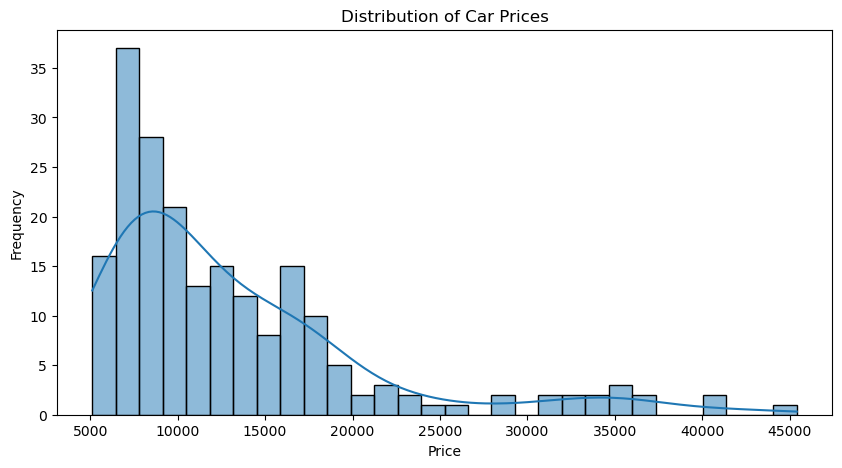

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Histogram of the price
plt.figure(figsize=(10, 5))
sns.histplot(df_cars['price'], bins=30, kde=True)
plt.title('Distribution of Car Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

**Insight** The distribution shows a right skew (with a long tail on the right), it indicates that most cars are priced lower, with a few-priced outliers. A common price point for most cars in the dataset is between 5000 - 10000

**2. Fuel Type Distribution**
The countplot for fuel types can indicate which type of fuel is most popular among the cars

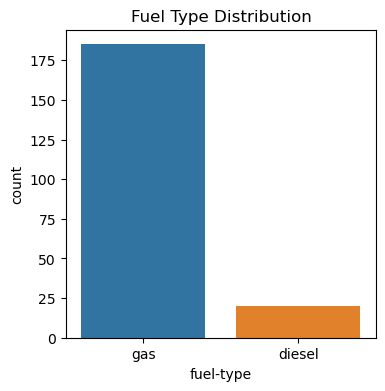

In [17]:
plt.figure(figsize=(4, 4))
sns.countplot(x='fuel-type', data=df_cars)
plt.title('Fuel Type Distribution')
plt.show()

**Insight** the count of cars using gasoline is significantly higher than those using diesel, it suggests a preference for gasoline vehicles

**3. Boxplot of Price by Body Style**
The boxplot provides a visual summry of price variations across different body styles.

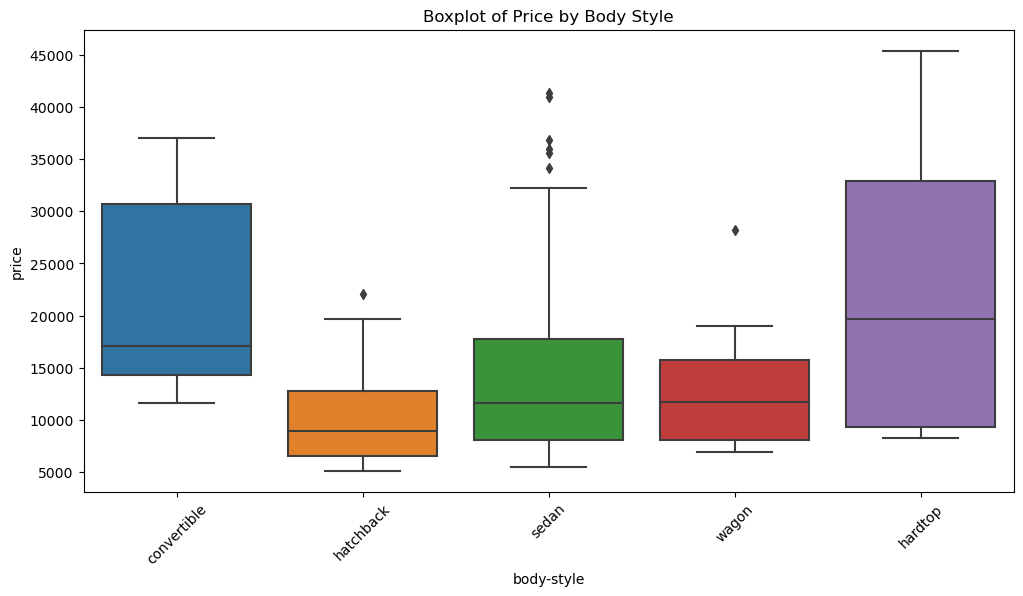

In [18]:
# Boxplot of Price by Body Style.
plt.figure(figsize=(12, 6))
sns.boxplot(x='body-style', y='price', data=df_cars)
plt.title('Boxplot of Price by Body Style')
plt.xticks(rotation=45)
plt.show()

**Insights** The medain value price for convertibles and hardtops is significantly higher than hatchback, sedan, and wagon. This suggests that these type of cars are typically expensive. There are few outliers in the prices of the hatchbacks, sedan,and wagon. These outliers might be attributed to luxury brands.

#### 4. Price vs Horsepower by make and fuel  

Here we want to explore how horsepower influences price across different car makes and fuel types. This scatter plot effectively visualizes the relationship between horsepower and price, segmented by make and fuel type. It provides valuable insights into market trends, consumer preferences, and brand performance.

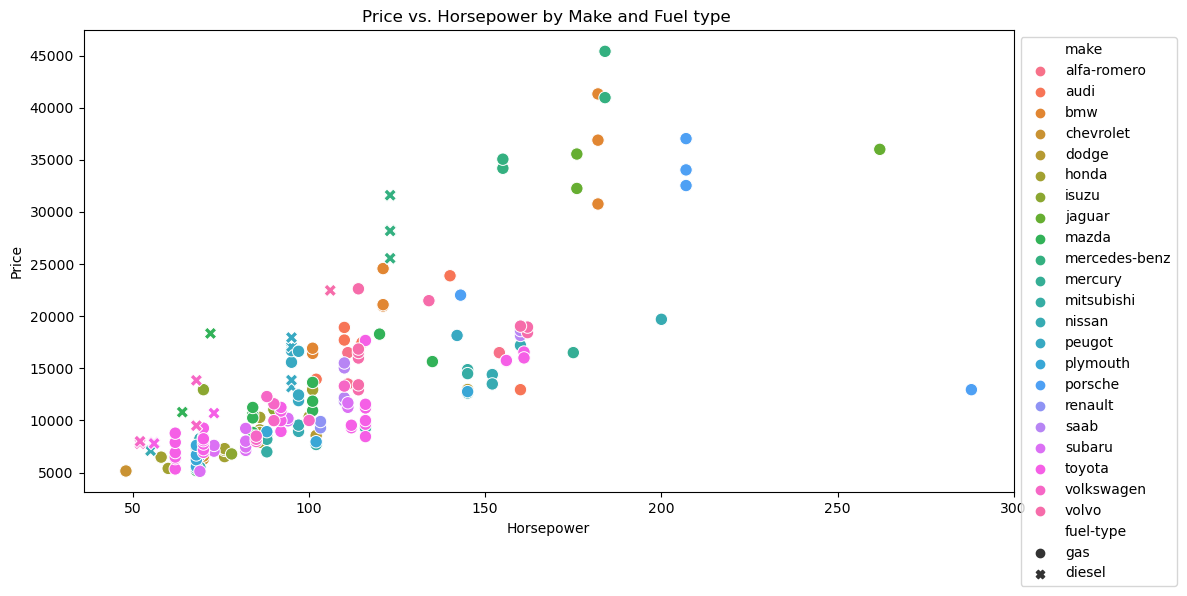

In [19]:
# Assuming 'df' is your DataFrame
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_cars, x='horsepower', y='price', hue='make', style = 'fuel-type', s=80)
plt.title("Price vs. Horsepower by Make and Fuel type ")
plt.xlabel("Horsepower")
plt.ylabel("Price")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()


**Insights:** The scatterplot shows a positive correlation between horsepower and price. As horsepower increases, price increases as well. This suggests that cars with higher performance (horsepower) are valued highly in the market.
Toyota, and Volkswagen cluster around the lower prices and horepower. Brands like porche, audi, bmw, and mercedes benz have higher horsepower 100. The market tend to prefer gasoline, because majority of cars use gasoline. Only few cars use diesel.

**5. Fuel efficiency in city by body-style**
The aim is to explore the fuel efficiency of each body type in the cities and highways.

In [20]:
# Assuming 'df_cars' is your DataFrame
# Calculate the average city and highway mpg by body-style
avg_mpg_by_body_style = df_cars.groupby('body-style')[['highway-mpg', 'city-mpg']].mean().sort_values(by='city-mpg', ascending=False)

avg_mpg_by_body_style


,highway-mpg,city-mpg
body-style,,
hatchback,32.171429,26.314286
sedan,30.833333,25.322917
wagon,28.720000,24.040000
hardtop,27.250000,21.625000
convertible,26.000000,20.500000


Looking at the above table, the following insights can be drawn:
**Hatchbacks** have the highest average fuel efficiency in both highway (32.17 mpg) and city (26.31 mpg) driving among all body styles. This suggests that hatchbacks are more fuel-efficient, especially for highway conditions.

**Sedans** come second in both highway (30.83 mpg) and city (25.32 mpg), indicating that sedans are also relatively fuel-efficient but might have more weight or design features impacting fuel efficiency compared to hatchbacks.

**Wagons, Hardtopd, and Convertibles** follow with progressively lower mpg values in both highway and city driving, with convertibles showing the lowest fuel efficiency on both measures. These types are generally heavier which could be the reason for lower fuel efficiency.

**The bar graph below shows the visual representation of the above table**

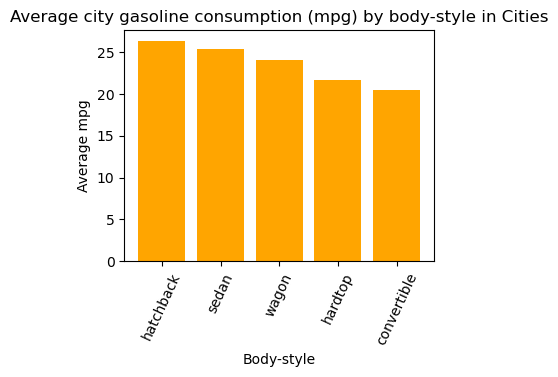

In [21]:
# Assuming 'df' is your DataFrame
# Calculate the average price by make
avg_price_by_make = df_cars.groupby('body-style')['city-mpg'].mean().sort_values(ascending=False)

# Plotting
plt.figure(figsize=(4, 3))
plt.bar(avg_price_by_make.index, avg_price_by_make.values, color='orange')
plt.title("Average city gasoline consumption (mpg) by body-style in Cities")
plt.xlabel("Body-style")
plt.ylabel("Average mpg")
plt.xticks(rotation=65)  # Rotate x labels for readability
plt.show()


**6. The relationship between Price and Wheelbase**
This scatter plot effectively visualize the relationship between wheelbase and price. catergorized by body style.

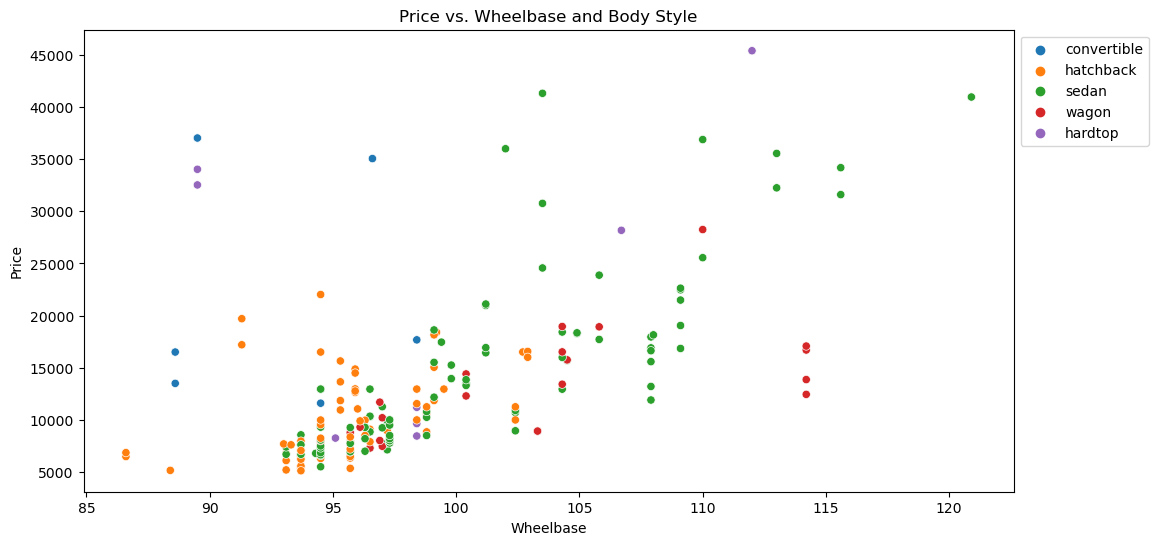

In [22]:
# Code here
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_cars, x='wheel-base', y='price', hue='body-style', sizes=(20, 200), legend='full')
plt.title("Price vs. Wheelbase and Body Style")
plt.xlabel("Wheelbase")
plt.ylabel("Price")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()



**Insights** The generally trend indicates that as the wheelbase of a vehicle increases, the price tends to rise as well. However, this relationship is not perfectly linear, suggesting that the correlation is not direct. This implies that other factors also play significant roles in influencing the price of a car.

In [23]:
df_cars_fuel_type = df_cars.groupby(['fuel-type'])


**7. Fuel efficiency by Fuel Type**
Here we will explore/determine which fuel type is efficient

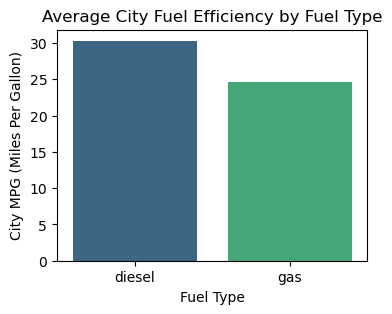

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group by fuel type and calculate mean city fuel efficiency
df_cars_fuel_type = df_cars.groupby(['fuel-type'])['city-mpg'].mean().reset_index()

# Plot the results
plt.figure(figsize=(4, 3))
sns.barplot(data=df_cars_fuel_type, x='fuel-type', y='city-mpg', palette='viridis')
plt.title("Average City Fuel Efficiency by Fuel Type")
plt.xlabel("Fuel Type")
plt.ylabel("City MPG (Miles Per Gallon)")
plt.show()


Looking at the barplot above, diesel bar is significantly higher than the gasoline bar, this suggests that diesel cars are more fuel efficient than gasoline cars.

**8. Comparison of Normalized Losses Across Vehicle Body Styles**
Here we will explore the risk profile of different vehicle body styles

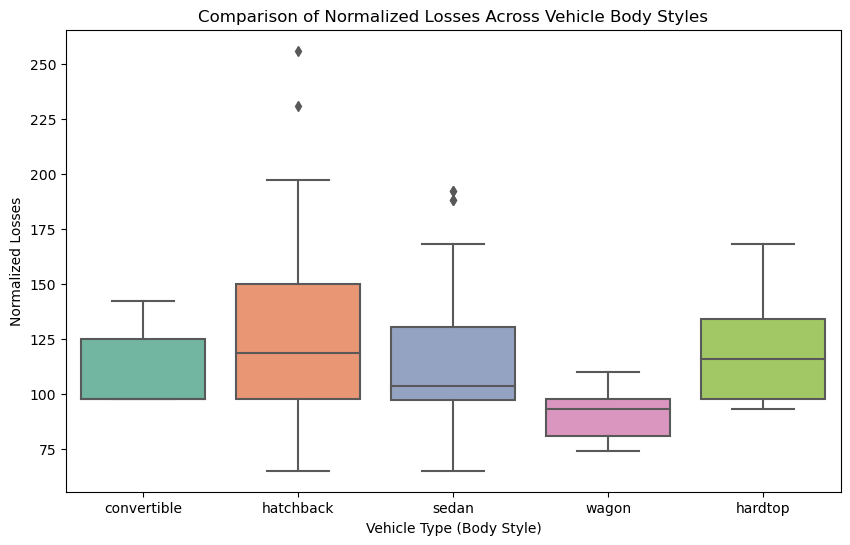

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert 'normalized-losses' to numeric, in case it has non-numeric values (e.g., '?')
df_cars['normalized-losses'] = pd.to_numeric(df_cars['normalized-losses'], errors='coerce')

# Drop any rows with NaN values in 'normalized-losses' and 'body-style' for cleaner visualization
df_cars_cleaned = df_cars.dropna(subset=['normalized-losses', 'body-style'])

# Plot the relationship between normalized-losses and body-style
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_cars_cleaned, x='body-style', y='normalized-losses', palette='Set2')
plt.title("Comparison of Normalized Losses Across Vehicle Body Styles")
plt.xlabel("Vehicle Type (Body Style)")
plt.ylabel("Normalized Losses")
plt.show()


**Insights**
***Convertibles:*** The median normalised loss for convertibles is moderate, around the middle of the y-axis range. There is a relatively narrow interquartile range (IQR), meaning most convertibles have similar normalised losses, indicating a consistent risk profile. The lack of extreme outliers suggests that convertibles are generally perceived as moderate-risk vehicles without much variation.

***Hatchbacks:*** Hatchbacks display a wide range in normalised losses, with the highest variability among all body styles. The median is higher compared to other types, indicating that hatchbacks tend to have a higher risk profile. The plot also shows outliers above and below the main distribution, reflecting some hatchback models with very high or very low risk factors. This could be due to the diversity within the hatchback category, with both economical and performance-focused models included.

***Sedans:*** Sedans have a moderate median for normalised losses, slightly lower than that of hatchbacks. There’s a smaller spread in the upper quartile but a larger one in the lower range, meaning that while most sedans have similar normalised losses, a few models stand out with much lower risk factors. The presence of an outlier below the main distribution could indicate specific sedan models that are designed to be safer or have lower risk factors

***Wagons:*** Wagons have the lowest normalised losses overall, with the median close to the bottom of the y-axis range. The narrow IQR indicates that most wagons are low-risk, with little variation, suggesting a high level of reliability or safety associated with this body style. This body style has no outliers, which could indicate that wagons have a uniform risk factor

***Hardtops:*** Hardtops show higher normalised losses than sedans and wagons but have a narrower spread. This body style has no outliers, which could indicate that hardtops have a uniform risk factor.
